In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
from scipy.stats import norm
from scipy.stats import uniform

from EfficiencyCalculator import EfficiencyCalculator

# Conditional Effieiency Model

In [26]:
n = 100

# generate environment variable z
np.random.seed(seed=2)
z = uniform.rvs(1, 10,size=n)
eps = np.random.exponential(3, n)
x1 = z ** (3/2) + eps  # case 1
x2 = 5 ** (3/2) + eps  # case 2
y = np.array([1] * n)


result = {}
for case, x in enumerate([x1, x2]):
    cal = EfficiencyCalculator(x, y)
    cal.set_environmental_variables(z)
    cal.set_bandwidth(h=0.9)
    cal.set_kernel(kernel='triangular')
    
    full = []
    full_z = []
    partial = []
    partial_z = []
    for i in range(n):
        full.append(cal.get_full_efficiency(dmu=i, conditional=False))
        partial.append(cal.get_partial_efficiency(dmu=i, conditional=False, m=25, B=200))
        full_z.append(cal.get_full_efficiency(dmu=i, conditional=True))
        partial_z.append(cal.get_partial_efficiency(dmu=i, conditional=True, m=25, B=200))
        
    result[case] = pd.DataFrame({'Full': full, 'Partial': partial, 'Full_z': full_z, 'Partial_z': partial_z})

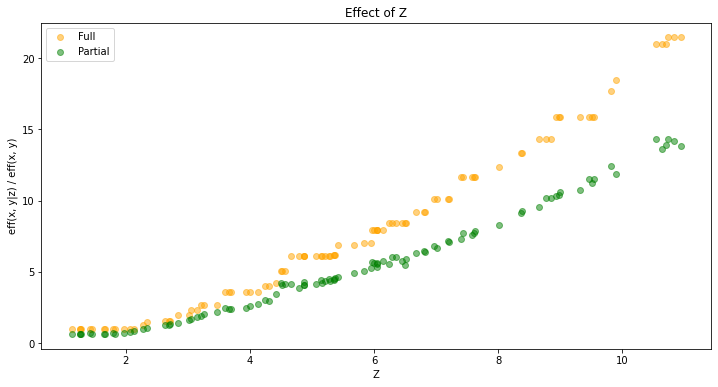

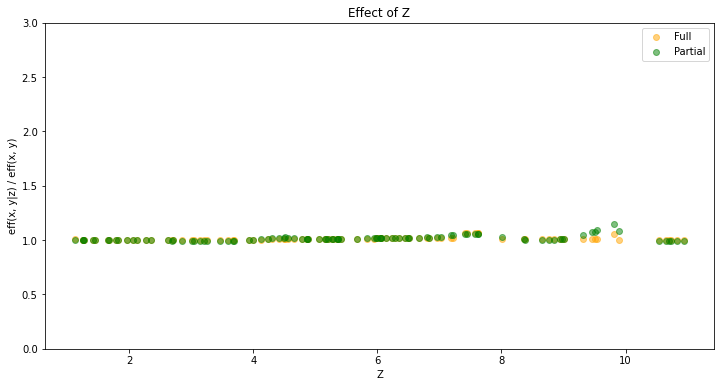

In [27]:
for i in range(2):
    temp = result[i]
    temp['z'] = z
    temp['R'] = temp['Full_z'] / temp['Full']
    temp['R_z'] = temp['Partial_z'] / temp['Partial']
    temp.sort_values(by='z', inplace=True)

    plt.figure(figsize=(12, 6))
    plt.title("Effect of Z")
    plt.xlabel("Z")
    plt.ylabel("eff(x, y|z) / eff(x, y)")
    plt.scatter(temp['z'], temp['R'], color='orange', alpha=0.5, label="Full")
    plt.scatter(temp['z'], temp['R_z'], color='green', alpha=0.5, label="Partial")
    if i == 1:
        plt.ylim(0, 3)
    plt.legend()